### *As part of my course in IBM DATA SCIENCE PROFESSIONAL CERTIFICATE, specifically in Data Analysis with Python, I would like to share my knowledge with you.*
### *In this notebook, we will analyze data about medical insurance costs, specifically the impact of certain factors such us smoking and bmi, on the increase in insurance costs. The project objectives and instructions are derived from the practice project for the course*
## By: **[Abdessamad Touzani](https://www.linkedin.com/in/abdessamadtouzani/)**
#### **Let's connect on LinkedIn!**

## **Objectives**
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 

In [2]:
#import required models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
print("Done")

Done


# **I) Import Data Set**

### **Please note that I used the link provided for me from the course, but if any, you can use the not clean dataset, that I donwloaded for you, instead of getting it from the url...**

In [12]:
url = ...#please consider using the not clean data I uploaded with the notebook...

In [13]:
df = pd.read_csv(url, header = None)

In [14]:
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [21]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


# **II) Data Wrangling**

### **Check NULL or missing values:**

If you use just .isnull(), it will give you the datframe with values Flase or True

In [22]:
#total of null values
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

### *Replace ? with Nan*

In [23]:
df.replace("?", np.NaN, inplace = True)

In [24]:
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


### Replace *Continuous Data* with the **mean** (In this case age)

In [26]:
#Calculate the mean of age
df["age"] = df["age"].astype(float) #Because age is type object
age_mean = df["age"].mean(axis = 0)
#Now let's replace the NaN with mean
df["age"].replace(np.NaN, age_mean, inplace = True)
print("Done")

Done


### Replace *Categorical* with **most frequent** value (in this case smoker)

In [27]:
# Calculate the most frequent value in smoker's column
frequent_smoker = df["smoker"].value_counts().idxmax()
df["smoker"].replace(np.NaN, frequent_smoker, inplace = True)
print("Done")

Done


Note: For frequent value, either you use value_counts().idxmax() or mode()[0], you must see the difference between them before use it

### **Update** Data Type

In [28]:
''' smoker and age are int type as we've seen in the dataframe, but when 
exploring concise summary of the data farme we can see an issue with the type of data '''
df[["smoker", "age"]].astype(int)
print("Done")

Done


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 151.7+ KB


Charges column has values which are more than 2 decimal places long. Update harges column such that all values are rounded to nearest 2 decimal places

In [30]:
df["charges"] = df["charges"].round(2)

In [31]:
#As we can see now, values are rounded to 2
df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1,3,16884.92
1,18.0,2,33.770,1,0,4,1725.55
2,28.0,2,33.000,3,0,4,4449.46
3,33.0,2,22.705,0,0,1,21984.47
4,32.0,2,28.880,0,0,1,3866.86


# **III) Exploraatory Data Analysis** EDA

### Regression plot for charges with respect to bmi:

<Axes: xlabel='bmi', ylabel='charges'>

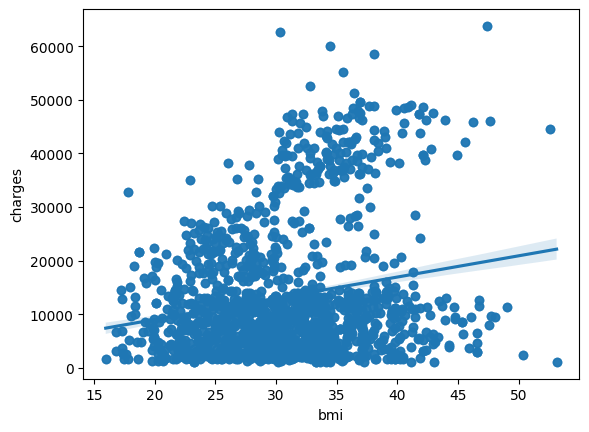

In [46]:
sns.regplot(x = "bmi", y="charges", data = df)

### Box plot for charges with respect to smoker:

<Axes: xlabel='smoker', ylabel='charges'>

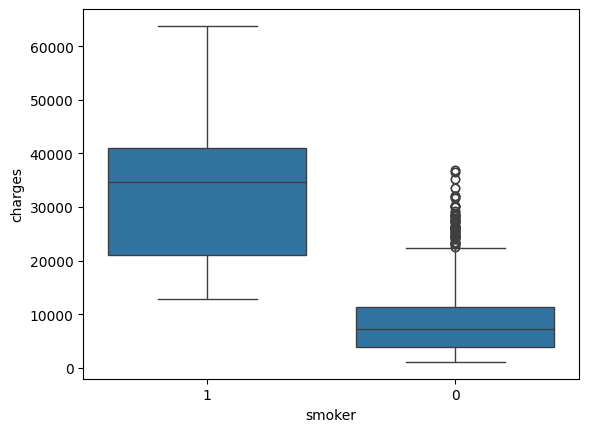

In [48]:
sns.boxplot(x="smoker", y="charges", data=df)

### Correlation matrix for the dataset:

In [49]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


## **VI) Model Development**

### *Fit linear regression model to predict charges using smoker attribute*

In simple linear regression, you're trying to fit a line to your data to model the relationship between two variables, usually denoted as x (independent variable) and y (dependent variable). 

- Target: The target, or dependent variable, is 'y' in this case. You're trying to predict or model 'y' based on the values of 'x'.

- Predictions: Once you've trained your linear regression model, you can use it to make predictions. Given a new value of 'x', your model will predict the corresponding 'y'. The predicted 'y' is what your model thinks the value should be based on the learned relationship from the training data.

In [35]:
#using fit() from 
x = df[['charges']] #prediction
y = df[['smoker']] #the target (the attribute we wanna predict)
lm = LinearRegression() #Create an instance of a linear regression model using the LinearRegression class.
lm.fit(x, y)

LinearRegression()

R² of model:

In [36]:
lm.score(x, y)

0.6221791733924185

As we can see about 62.2% of the variability in the dependent variable can be predicted or explained by the independent variable(s) using the linear regression model.

### *Fit linear regression model to predict charges using all other attributes*

In this case, X the prediction will be all the attributes but charges.

In [39]:
df.head(1)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.9,0,1,3,16884.92


In [40]:
x = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
y = df['charges']
lm.fit(x, y)

LinearRegression()

R² of model:

In [42]:
lm.score(x, y)

0.7504063772187107

As we can see about 62.2% of the variability in the dependent variable can be predicted or explained by the independent variable(s) using the MLR. 

Note that if the regression wasn't the best fit for your model, you can think to use polynomial regression.

### **Improve performance:**

Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

- Import all necessary models
- Import pipeline
- Create a list of tuples
- Create your pipeline object

In [47]:
#Create list of tuples:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
x = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
y = df[['charges']]
pipe.fit(x, y) #fit prediction and target

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [49]:
#you can use the pipeline object for prediction
pipe.predict(x)

array([[23847.25],
       [ 2822.75],
       [ 5256.5 ],
       ...,
       [21707.25],
       [ 2295.25],
       [11902.5 ]])

#### A reference I found helpful doing this project, check the link below: (Note that's in french) 
#### Vous pouvez consultez ce lien comme référence pour le régression linéaire:
[Régression Linéare](https://fermin.perso.math.cnrs.fr/Files/Chap3.pdf)

## **V) Model Refinement**

We were workin in sample evaluation, and it's just tell us how well our model will fit the data used to train it, but it will not tell us how well the trained model can be used to predict new data. And here when it comes out of sample evaluation or test set. Simply we split data to training data, and testing data.

*Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.*

In [55]:
#using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) #test size is the 20% data that will be reserved for testing
print("Done")

Done


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $

In [60]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
#use it for prediction
prediction = RidgeModel.predict(x_test)
prediction

array([[ 3.36240289e+04],
       [ 2.05256412e+03],
       [ 8.57740314e+03],
       [ 3.37119233e+03],
       [ 2.97574662e+04],
       [ 2.78827664e+03],
       [ 3.23867433e+04],
       [ 4.36592582e+00],
       [-1.13365351e+03],
       [ 1.55324042e+04],
       [ 7.30896627e+03],
       [ 1.54573866e+04],
       [ 1.28500545e+04],
       [ 3.03976578e+04],
       [ 1.32035353e+04],
       [ 2.09640120e+03],
       [ 1.37808512e+04],
       [ 4.73766641e+03],
       [ 1.44462593e+04],
       [ 1.81541698e+04],
       [ 1.34993143e+04],
       [ 3.84729729e+03],
       [ 4.90363830e+03],
       [ 4.01573324e+04],
       [ 2.87306145e+04],
       [ 1.25954766e+04],
       [ 3.81320796e+04],
       [ 5.67604349e+03],
       [ 1.26401918e+04],
       [ 2.80107997e+04],
       [ 1.35647013e+04],
       [ 1.10489225e+04],
       [ 2.89371076e+04],
       [ 5.43415197e+03],
       [ 1.26403007e+03],
       [ 1.00922945e+04],
       [ 4.04284356e+03],
       [ 1.49688081e+04],
       [ 1.1

In [63]:
#score or R square 
r2_score(y_test, prediction)

0.6760802462837339

## Exercice:
### Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


If any, you can contact me on LinkedIn:
### **[Abdessamd Touzani](https://www.linkedin.com/in/abdessamadtouzani/)**